In [1]:
# Import Necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset Information

The Notification Log data used for this analysis was collected from my personal phone over a period of over 30 hours with the help of a free android app- __Notification Log__. A vast range of notification information was collected and analysed below.

In [2]:
# Load the Notifications Dataset
notifications_df = pd.read_csv("notification_data.csv") 

### Data Exploration

Understanding the basic nature of the notification dataset

In [3]:
notifications_df.sample(10)

,packageName,postTime,systemTime,offset,version,sdk,isOngoing,isClearable,when,number,...,key,visibility,color,interruptionFilter,listenerHints,matchesInterruptionFilter,style,category,textLines,sortKey
4119,com.a0soft.gphone.uninstaller,1659732262626,1659732263137,7200000,16,30,True,False,0,-1,...,0|com.a0soft.gphone.uninstaller|103|null|10439,0,-1684967,1,0,True,android.app.Notification$DecoratedCustomViewStyle,NaN,NaN,NaN
2877,com.sec.android.app.music,1659715910162,1659715910620,7200000,16,30,True,False,1659714889674,-1,...,0|com.sec.android.app.music|2131362670|null|10193,1,0,1,0,True,android.app.Notification$MediaStyle,transport,NaN,NaN
57,com.Slack,1659632391485,1659649736482,7200000,16,30,False,True,1659632391460,-1,...,0|com.Slack|768158120|null|10191,0,-15065823,1,0,True,android.app.Notification$MessagingStyle,msg,NaN,NaN
4134,com.sec.android.app.shealth,1659732272025,1659732272379,7200000,16,30,True,False,1659732272018,-1,...,0|com.sec.android.app.shealth|105|null|10184,0,0,1,0,True,android.app.Notification$BigTextStyle,NaN,NaN,NaN
183,com.android.systemui,1659653658868,1659653659143,7200000,16,30,True,False,0,-1,...,-1|com.android.systemui|2131362956|charging_st...,1,-7827550,1,0,True,android.app.Notification$BigTextStyle,sys,NaN,NaN
688,com.google.android.googlequicksearchbox,1659684669318,1659684669547,7200000,16,30,False,True,1659684669290,-1,...,0|com.google.android.googlequicksearchbox|0|93...,0,-12417548,1,0,True,NaN,NaN,NaN,NaN
1995,com.android.vending,1659709641760,1659709642001,7200000,16,30,True,False,1659709641752,-1,...,0|com.android.vending|-56862258|null|10057,-1,-16677025,1,0,True,NaN,NaN,NaN,NaN
1833,com.a0soft.gphone.uninstaller,1659706370992,1659706371205,7200000,16,30,True,False,0,-1,...,0|com.a0soft.gphone.uninstaller|103|null|10439,0,-1684967,1,0,True,android.app.Notification$DecoratedCustomViewStyle,NaN,NaN,NaN
2405,com.sec.android.app.shealth,1659714705398,1659714705628,7200000,16,30,True,False,1659714705390,-1,...,0|com.sec.android.app.shealth|105|null|10184,0,0,1,0,True,android.app.Notification$BigTextStyle,NaN,NaN,NaN
3257,com.a0soft.gphone.uninstaller,1659720079582,1659720079800,7200000,16,30,True,False,0,-1,...,0|com.a0soft.gphone.uninstaller|103|null|10439,0,-1684967,1,0,True,android.app.Notification$DecoratedCustomViewStyle,NaN,NaN,NaN


In [4]:
# Check Shape of Dataset
notifications_df.shape

(4544, 49)

In [5]:
# Check Available Columns
notifications_df.columns

Index(['packageName', 'postTime', 'systemTime', 'offset', 'version', 'sdk',
       'isOngoing', 'isClearable', 'when', 'number', 'flags', 'defaults',
       'ledARGB', 'ledOn', 'ledOff', 'ringerMode', 'isScreenOn',
       'batteryLevel', 'batteryStatus', 'isConnected', 'connectionType',
       'hasAppointment', 'group', 'isGroupSummary', 'actionCount',
       'isLocalOnly', 'people', 'tickerText', 'title', 'titleBig', 'text',
       'textBig', 'textInfo', 'textSub', 'textSummary', 'appName', 'priority',
       'nid', 'tag', 'key', 'visibility', 'color', 'interruptionFilter',
       'listenerHints', 'matchesInterruptionFilter', 'style', 'category',
       'textLines', 'sortKey'],
      dtype='object')

In [6]:
# Check Basic Notification Dataset Information
notifications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packageName                4544 non-null   object
 1   postTime                   4544 non-null   int64 
 2   systemTime                 4544 non-null   int64 
 3   offset                     4544 non-null   int64 
 4   version                    4544 non-null   int64 
 5   sdk                        4544 non-null   int64 
 6   isOngoing                  4544 non-null   bool  
 7   isClearable                4544 non-null   bool  
 8   when                       4544 non-null   int64 
 9   number                     4544 non-null   int64 
 10  flags                      4544 non-null   int64 
 11  defaults                   4544 non-null   int64 
 12  ledARGB                    4544 non-null   int64 
 13  ledOn                      4544 non-null   int64 
 14  ledOff  

In [7]:
notifications_df.describe()

,postTime,systemTime,offset,version,sdk,when,number,flags,defaults,ledARGB,...,ringerMode,batteryLevel,actionCount,people,priority,nid,visibility,color,interruptionFilter,listenerHints
count,4.544000e+03,4.544000e+03,4544.0,4544.0,4544.0,4.544000e+03,4544.0,4544.000000,4544.0,4544.0,...,4544.0,4544.000000,4544.000000,4544.0,4544.000000,4.544000e+03,4544.000000,4.544000e+03,4544.0,4544.0
mean,1.659706e+12,1.659707e+12,7200000.0,16.0,30.0,1.013938e+12,-1.0,105.622359,0.0,0.0,...,1.0,39.175176,0.427817,0.0,-0.424076,4.349260e+08,0.139085,-6.678447e+06,1.0,0.0
std,2.422396e+07,2.337514e+07,0.0,0.0,0.0,8.092645e+11,0.0,142.757796,0.0,0.0,...,0.0,16.410354,0.906397,0.0,1.571385,9.011886e+08,0.526661,6.697834e+06,0.0,0.0
min,1.659593e+12,1.659650e+12,7200000.0,16.0,30.0,0.000000e+00,-1.0,0.000000,0.0,0.0,...,1.0,0.000000,0.000000,0.0,-2.000000,-2.147484e+09,-1.000000,-1.674760e+07,1.0,0.0
25%,1.659696e+12,1.659696e+12,7200000.0,16.0,30.0,0.000000e+00,-1.0,10.000000,0.0,0.0,...,1.0,27.000000,0.000000,0.0,-2.000000,1.000000e+00,0.000000,-1.506582e+07,1.0,0.0
50%,1.659713e+12,1.659713e+12,7200000.0,16.0,30.0,1.659689e+12,-1.0,106.000000,0.0,0.0,...,1.0,45.000000,0.000000,0.0,-1.000000,1.030000e+02,0.000000,-1.684967e+06,1.0,0.0
75%,1.659721e+12,1.659721e+12,7200000.0,16.0,30.0,1.659715e+12,-1.0,106.000000,0.0,0.0,...,1.0,54.000000,0.000000,0.0,1.000000,1.050000e+02,0.000000,0.000000e+00,1.0,0.0
max,1.659743e+12,1.659743e+12,7200000.0,16.0,30.0,1.659743e+12,-1.0,1794.000000,0.0,0.0,...,1.0,56.000000,4.000000,0.0,2.000000,2.147484e+09,1.000000,0.000000e+00,1.0,0.0


### Data Cleaning & Feature Engineering

In this section, I investigated the dataset's features to get a deeper understanding of the essential metrics that could be analysed for helpful insight.

Data Cleaning Practices used include:
           
           1. Removing unnecessary features/columns
           2. Checking for & Handling Null Values.
           3. Checking for Duplicated Notification Logs
           4. Converting columns to their approriate data types
           

In [8]:
# drop irrelevant columns from the 2018 dataset
drop_list = ['offset', 'version', 'sdk', 'sortKey', 'textLines', 'category', 'style', 'key', 'textSummary', 'textSub', 'textInfo', 'textBig', 'titleBig', 'tickerText',
            'ringerMode', 'packageName', 'defaults', 'flags', 'listenerHints', 'color', 'visibility',
            'people', 'number', 'nid', 'matchesInterruptionFilter', 'hasAppointment', 'ledARGB', 'ledOn', 'ledOff',
            'isClearable', 'tag', 'interruptionFilter', 'group', 'isGroupSummary']

notifications_df.drop(drop_list, axis=1, inplace=True)

# confirm changes
notifications_df.head(10)

,postTime,systemTime,isOngoing,when,isScreenOn,batteryLevel,batteryStatus,isConnected,connectionType,actionCount,isLocalOnly,title,text,appName,priority
0,1659624332902,1659649734578,False,1659624332807,True,9,discharging,True,wifi,0,False,TERMS OF USE | Tinder | Match. Chat. Meet. Mod...,Page is ready to view,Chrome,-1
1,1659647949583,1659649734636,False,1659647966000,True,9,discharging,True,wifi,0,False,Tomorrow in Kigali: Mostly sunny,26° / 16° · See full forecast,Google,-1
2,1659647949572,1659649734675,False,1659647949548,True,9,discharging,True,wifi,0,False,NaN,NaN,Google,-1
3,1659621628790,1659649734724,False,1659621628531,True,9,discharging,True,wifi,0,True,An account was deleted.,Delete apps unassociated with any account.,Google Play Store,-1
4,1659592821702,1659649734752,False,1659550058000,True,9,discharging,True,wifi,0,False,Chelsea News,Man City made late move to keep new Chelsea pl...,Google,-1
5,1659636441864,1659649734791,False,1659636458000,True,9,discharging,True,wifi,0,False,Chelsea News,Chelsea handed first big injury boost of new s...,Google,-1
6,1659647111864,1659649734808,False,1658819996375,True,9,discharging,True,wifi,0,False,<master-komezart> ARTWORK DATABASE 2: 2022_Tic...,⁨Yvan King Mukunzi⁩ resolved a comment Done: “...,Drive,0
7,1659647111848,1659649734832,False,1659647111817,True,9,discharging,True,wifi,0,False,NaN,NaN,Drive,0
8,1659636154356,1659649734855,False,1659636154235,True,9,discharging,True,wifi,3,False,Screenshot saved,Tap here to open it in Gallery.,Samsung capture,0
9,1659647804894,1659649734909,False,1659647804860,True,9,discharging,True,wifi,0,False,Your data isn’t backed up,Add a backup account now,Google Play services,1


In [9]:
notifications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   postTime        4544 non-null   int64 
 1   systemTime      4544 non-null   int64 
 2   isOngoing       4544 non-null   bool  
 3   when            4544 non-null   int64 
 4   isScreenOn      4544 non-null   bool  
 5   batteryLevel    4544 non-null   int64 
 6   batteryStatus   4544 non-null   object
 7   isConnected     4544 non-null   bool  
 8   connectionType  4544 non-null   object
 9   actionCount     4544 non-null   int64 
 10  isLocalOnly     4544 non-null   bool  
 11  title           4415 non-null   object
 12  text            4131 non-null   object
 13  appName         4544 non-null   object
 14  priority        4544 non-null   int64 
dtypes: bool(4), int64(6), object(5)
memory usage: 408.4+ KB


In [10]:
notifications_df.sample(10)

,postTime,systemTime,isOngoing,when,isScreenOn,batteryLevel,batteryStatus,isConnected,connectionType,actionCount,isLocalOnly,title,text,appName,priority
1741,1659705227919,1659705228159,True,0,True,55,charging,True,wifi,0,False,Cable charging (1 h 13 m until full),55% (1 h 13 m until full),System UI,-2
1470,1659702356079,1659702356317,True,0,False,28,charging,True,wifi,0,False,Cable charging (1 h 51 m until full),28% (1 h 51 m until full),System UI,-2
3163,1659719168429,1659719168805,False,1659719180000,True,54,discharging,True,mobile,2,False,Troll Football🌪 (25 messages): +250 733 616 574,😂😂😂yeah whatever bro,WhatsApp,0
930,1659694149506,1659694149885,False,1659694159000,True,12,discharging,True,wifi,2,False,Wavii🤞🏽,Oh that's good \r\n\r\nAmetuma video ya keish,WhatsApp,0
1423,1659701792218,1659701792451,True,0,False,23,charging,True,wifi,0,False,Cable charging (1 h 59 m until full),23% (1 h 59 m until full),System UI,-2
3963,1659731720366,1659731720600,True,0,True,43,discharging,True,wifi,0,False,"Today, used device 5h 27m",Checked device 128 times,App Usage,-2
1024,1659695468511,1659695468757,False,1659695485000,True,4,charging,True,wifi,0,False,24° in Kigali,Partly cloudy · See more,Google,-2
2384,1659714695426,1659714695672,True,1659714695405,True,56,discharging,False,none,0,False,778 steps,"Your target is 6,000 steps.",Samsung Health,2
1948,1659709554276,1659709554511,True,1659709554266,True,51,discharging,True,wifi,2,False,Tinder - Dating Made Easy,2 minutes left,Google Play Store,-1
2982,1659715991897,1659715992121,True,1659715991889,True,54,discharging,False,none,0,False,"1,481 steps","Your target is 6,000 steps.",Samsung Health,2


In [11]:
# Checking for duplicate Notifications.
notifications_df.duplicated().sum()

0

In [12]:
# Total Number of Applications that sent notifications to test phone.
len(notifications_df.appName.unique())

43

In [13]:
# List of Apps that sent Notifications to the test phone
notifications_df.appName.unique()

array(['Chrome', 'Google', 'Google Play Store', 'Drive',
       'Samsung capture', 'Google Play services', 'Analytics Vidhya',
       'LinkedIn', 'Crowd Evolution!', 'A downloader for Instagram',
       'Chelsea', 'Duo', 'Samsung account', 'Twitter', 'Pinterest',
       'Instagram', 'YouTube', 'TikTok Lite', 'Facebook', 'System UI',
       'Truecaller', 'Slack', 'Snapchat', 'WhatsApp', 'Gmail',
       'Samsung Health', 'DataCamp', 'Weather', 'Samsung Cloud', 'Clock',
       'Call', 'Messages', 'Package installer', 'App Usage', 'Asana',
       'Edge panels', 'Shazam', 'Galaxy Themes', 'XRecorder',
       'Android System', 'Samsung Music', 'Airbnb', 'DStv'], dtype=object)

In [14]:
notifications_df['priority'].unique()

array([-1,  0,  1,  2, -2])

In [15]:
# Checking for Null Values
notifications_df.isnull().sum()

postTime            0
systemTime          0
isOngoing           0
when                0
isScreenOn          0
batteryLevel        0
batteryStatus       0
isConnected         0
connectionType      0
actionCount         0
isLocalOnly         0
title             129
text              413
appName             0
priority            0
dtype: int64

In [16]:
notifications_df[notifications_df['title'].isnull()]

,postTime,systemTime,isOngoing,when,isScreenOn,batteryLevel,batteryStatus,isConnected,connectionType,actionCount,isLocalOnly,title,text,appName,priority
2,1659647949572,1659649734675,False,1659647949548,True,9,discharging,True,wifi,0,False,NaN,NaN,Google,-1
7,1659647111848,1659649734832,False,1659647111817,True,9,discharging,True,wifi,0,False,NaN,NaN,Drive,0
29,1659625814596,1659649735661,False,1659625814595,True,9,discharging,True,wifi,0,True,NaN,NaN,Chelsea,0
45,1659639869360,1659649736223,False,1659639869360,True,9,discharging,True,wifi,0,True,NaN,NaN,TikTok Lite,0
50,1659642612512,1659649736296,False,1659642612496,True,9,discharging,True,wifi,0,True,NaN,NaN,Facebook,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,1659737866085,1659737866313,False,1659737866067,True,35,discharging,True,wifi,0,False,NaN,NaN,Google,-1
4319,1659737868230,1659737868463,False,1659737868162,True,35,discharging,True,wifi,0,False,NaN,NaN,Google,-1
4322,1659739325644,1659739344947,True,1659739325629,True,31,discharging,True,wifi,0,False,NaN,Updating…,Weather,0
4330,1659739755012,1659739755290,False,1659739754993,True,30,discharging,True,wifi,0,False,NaN,NaN,Google,-2


### Correcting Incorrectly tagged data types.

Convert __postTime__, __systemTime__ & __when__ columns to from integer type to datetime data type

In [17]:
import datetime

# Converting appropriate columsn to datetime
notifications_df['postTime'] = pd.to_datetime(notifications_df['postTime'], unit='ms')
notifications_df['systemTime'] = pd.to_datetime(notifications_df['systemTime'], unit='ms')
notifications_df['when'] = pd.to_datetime(notifications_df['when'], unit='ms')

In [18]:
notifications_df.sample(5)

,postTime,systemTime,isOngoing,when,isScreenOn,batteryLevel,batteryStatus,isConnected,connectionType,actionCount,isLocalOnly,title,text,appName,priority
774,2022-08-05 08:32:20.840,2022-08-05 08:32:21.076,True,1970-01-01 00:00:00.000,False,25,discharging,True,wifi,0,False,"Today, used device 2h 11m",Checked device 43 times,App Usage,-2
3065,2022-08-05 16:40:26.191,2022-08-05 16:40:26.434,True,1970-01-01 00:00:00.000,True,54,discharging,False,none,0,False,"Today, used device 4h 34m",Checked device 86 times,App Usage,-2
2760,2022-08-05 15:55:43.814,2022-08-05 15:55:44.040,True,2022-08-05 15:55:43.806,False,55,discharging,False,none,0,False,"1,256 steps","Your target is 6,000 steps.",Samsung Health,2
4221,2022-08-05 21:00:10.270,2022-08-05 21:00:10.532,False,2022-08-05 20:59:51.000,False,42,discharging,True,wifi,2,False,Troll Football🌪 (41 messages): +250 783 055 236,Imagine having 3 forwards in a team that had 0...,WhatsApp,0
69,2022-08-04 20:48:55.654,2022-08-04 21:48:56.703,False,2022-08-04 19:13:12.000,True,9,discharging,True,wifi,2,False,Troll Football🌪 (6 messages): +250 783 055 236,"I'm not bad😂I'm just unmotivated, I always los...",WhatsApp,0


In [19]:
notifications_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   postTime        4544 non-null   datetime64[ns]
 1   systemTime      4544 non-null   datetime64[ns]
 2   isOngoing       4544 non-null   bool          
 3   when            4544 non-null   datetime64[ns]
 4   isScreenOn      4544 non-null   bool          
 5   batteryLevel    4544 non-null   int64         
 6   batteryStatus   4544 non-null   object        
 7   isConnected     4544 non-null   bool          
 8   connectionType  4544 non-null   object        
 9   actionCount     4544 non-null   int64         
 10  isLocalOnly     4544 non-null   bool          
 11  title           4415 non-null   object        
 12  text            4131 non-null   object        
 13  appName         4544 non-null   object        
 14  priority        4544 non-null   int64         
dtypes: b

In [20]:
notifications_df.describe()

,batteryLevel,actionCount,priority
count,4544.000000,4544.000000,4544.000000
mean,39.175176,0.427817,-0.424076
std,16.410354,0.906397,1.571385
min,0.000000,0.000000,-2.000000
25%,27.000000,0.000000,-2.000000
50%,45.000000,0.000000,-1.000000
75%,54.000000,0.000000,1.000000
max,56.000000,4.000000,2.000000


# Exploratory Data Analysis 

## Analysis Questions.
        
        1. What are the top 10 Applications that triggered the highest amount of notifications in the 30+ hours of data collection?
        2. Within what timeframe did notifications peak over the 30+ hours of data collection? 
        3. Which applications triggered more user actions?
        4. What type of notifications capture more average user actions?
        5. What is the Distribution of Notifications sent via WiFi connection, Mobile Internet and without Internet Connection?
        6. Which apps sent the most high priority notifications?

# 1. What are the top 10 Applications that triggered the highest amount of notifications in the 30+ hours of data collection?

This question seeks to investigate the top 10 applications that sent the highest notification traffic to the mobile device. This will help us understand which applications are most active in sending notifications to my personal mobile device.

In [21]:
# Count Number of Notifications for each Application Logged
top_10_app_triggers = notifications_df.appName.value_counts().head(10)
top_10_app_triggers

Samsung Health          955
App Usage               948
System UI               850
WhatsApp                615
Google Play Store       338
Google                  197
Android System           82
Call                     76
Samsung Music            70
Google Play services     57
Name: appName, dtype: int64

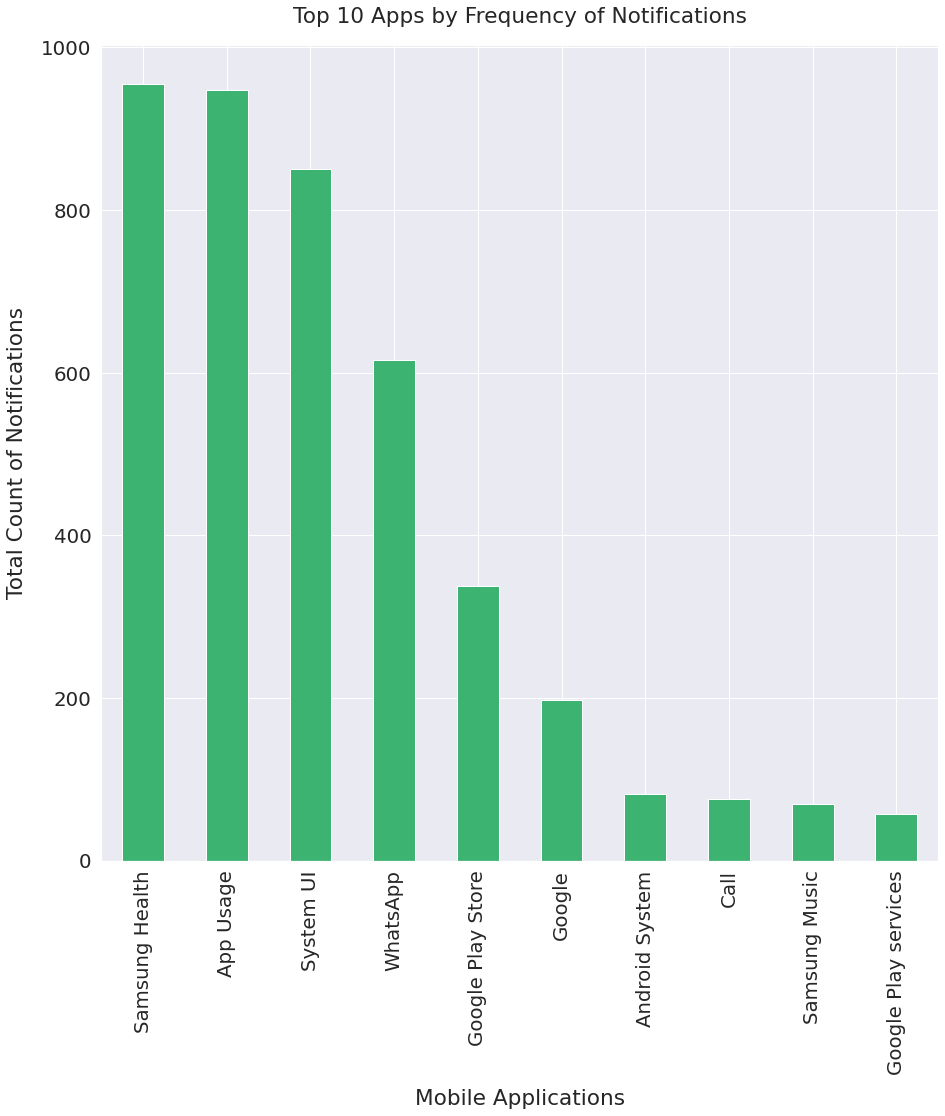

In [73]:
# Visualise plot for Top 20 Mobile Apps to send notifications within data scraping period
sns.set(font_scale=1.8)
top_10_app_triggers.plot(kind='bar', figsize=(15, 15), rot=0, color='mediumseagreen')
plt.xlabel("Mobile Applications", labelpad=14)
plt.ylabel("Total Count of Notifications", labelpad=14)
plt.xticks(rotation = 90) 
plt.title("Top 10 Apps by Frequency of Notifications", y=1.02);
plt.show()

# 2. Within what timeframe did notifications peak over the 30+ hours of data collection?

This question seeks to investigate the specific timeframe (Hours of the Day) when most notifications were sent to the mobile device. This aims to investigate when notification triggers peaked.

In [25]:
# I also created a new column to hold the hour value of the notification post times
# within a 24 hour cycle For Analysing Peak Times
notifications_df['Time_inHours'] = pd.to_datetime(notifications_df['postTime']).dt.hour

In [27]:
notifications_df.sample(3)

,postTime,systemTime,isOngoing,when,isScreenOn,batteryLevel,batteryStatus,isConnected,connectionType,actionCount,isLocalOnly,title,text,appName,priority,Time_inHours
753,2022-08-05 08:21:02.883,2022-08-05 08:21:03.127,True,1970-01-01 00:00:00.000,True,27,discharging,True,wifi,0,False,"Today, used device 2h 5m",Checked device 42 times,App Usage,-2,8
308,2022-08-05 00:00:02.404,2022-08-05 00:00:02.653,True,1970-01-01 00:00:00.000,False,26,charging,True,wifi,0,False,Cable charging (2 h 25 m until full),26% (2 h 25 m until full),System UI,-2,0
3473,2022-08-05 17:56:34.500,2022-08-05 17:56:34.779,True,2022-08-05 15:54:49.674,True,53,discharging,True,mobile,4,False,"Marshmello, Kane Brown - One Thing Right (Audio)",Unknown,Samsung Music,0,17


In [29]:
# Evaluate Total Count of transactions for every hour in a day
notifications_by_hour = notifications_df['Time_inHours'].value_counts()
notifications_by_hour

15    648
17    402
14    354
20    347
10    329
23    295
19    293
12    273
16    261
0     209
13    183
11    158
21    150
22    142
9     117
18     99
6      91
7      86
8      74
5      17
3       9
4       5
2       2
Name: Time_inHours, dtype: int64

In [36]:
# Array for holding x-axis values for visualisation of transactions time distribution
hours_in_day = [15,17,14,20,10,23,19,12,16,0,13,11,21,22,9,18,6,7,8,5,3,4,2]

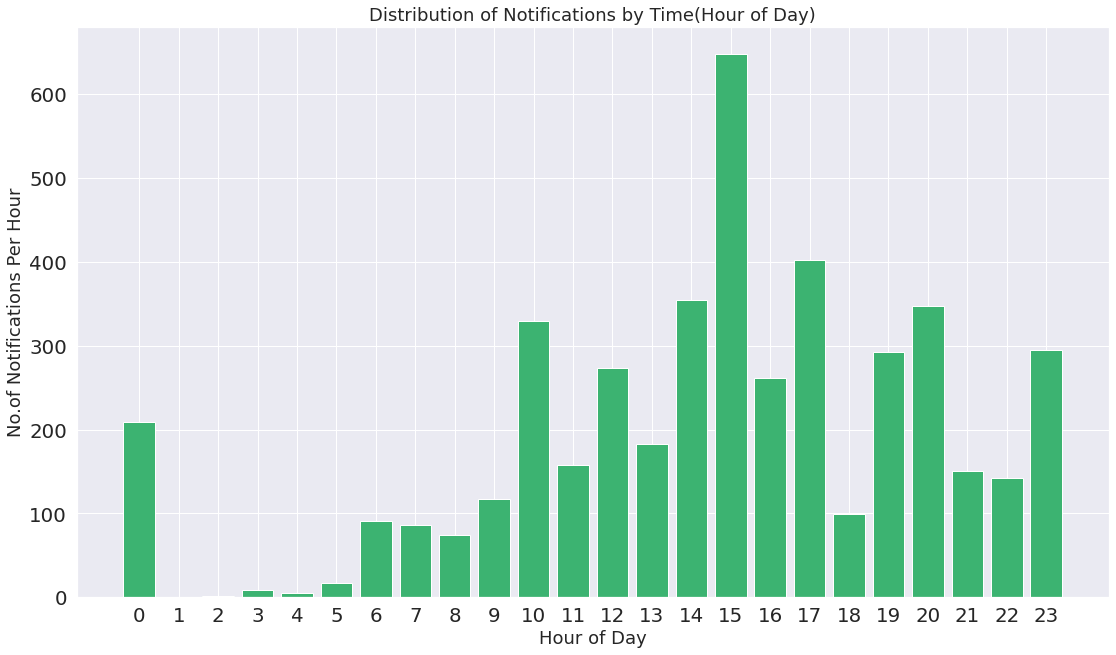

In [40]:
# Visualising Distribution of Transactions by Time(Hour of Day)
plt.bar(hours_in_day,notifications_by_hour, color='mediumseagreen')
plt.ylabel('No.of Notifications Per Hour', fontsize = 18)
plt.xlabel('Hour of Day', fontsize = 18)
plt.title('Distribution of Notifications by Time(Hour of Day)', fontsize = 18)
plt.xticks(np.arange(0, len(hours_in_day)+1, 1))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

# 3. Which applications triggered more user actions?

This question seeks to identify the applications that triggered more user actions. This information would help us understand the specific application notifications that prompted higher user engagement. 


To evaluate this, I grouped all notifications in the log by their __appName__ and evaluated the mean/average of the __actionCount__ feature then sorted the results in descending order.

In [67]:
# Group Notifications by their appNames & Find mean of actionCount
top15_engaging_apps = notifications_df.groupby(['appName'])['actionCount'].mean()

# Sort top 15 most engaging apps that triggered notification user action 
top15_apps = top15_engaging_apps.sort_values(ascending=False).head(15)
top15_apps

appName
Samsung Music        4.000000
Chrome               3.636364
Samsung capture      3.000000
Messages             2.800000
Twitter              2.333333
Google Play Store    1.852071
Gmail                1.632653
Facebook             1.600000
Instagram            1.500000
YouTube              1.333333
WhatsApp             1.081301
Pinterest            1.000000
Duo                  1.000000
Shazam               1.000000
Slack                0.857143
Name: actionCount, dtype: float64

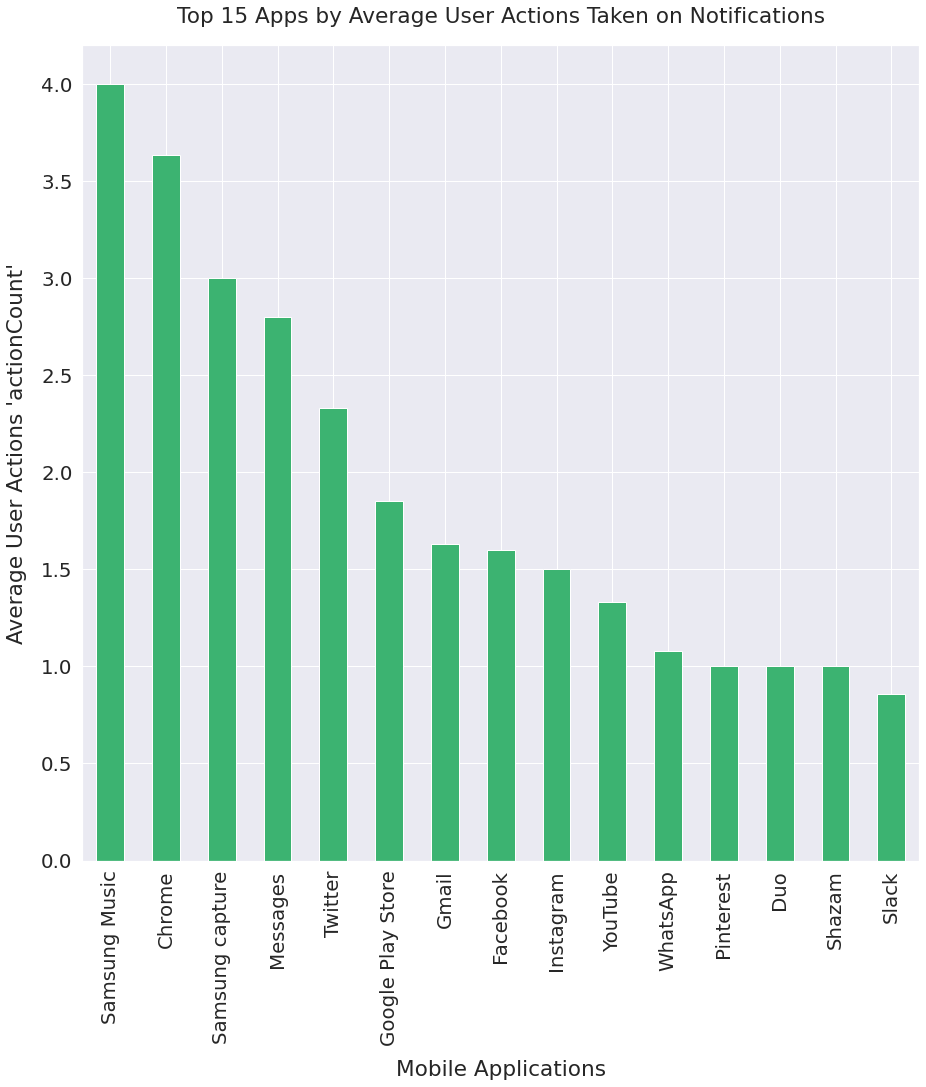

In [69]:
# Visualise plot for Top 20 Mobile Apps to send notifications within data scraping period
sns.set(font_scale=1.8)
top15_apps.plot(kind='bar', figsize=(15, 15), rot=0, color='mediumseagreen')
plt.xlabel("Mobile Applications", labelpad=14)
plt.ylabel("Average User Actions 'actionCount'", labelpad=14)
plt.xticks(rotation = 90) 
plt.title("Top 15 Apps by Average User Actions Taken on Notifications", y=1.02);
plt.show()

# 4. What type of notifications capture more average user actions??

This question investigates which specific type of notifications trigger more user actions on average. This information will give insight on whether users interact more with local notifications or push notifications.


## Local Notifications Vs Push Notifications

__Push Notifications__ come from a remote server and is pushed/sent directly to a user's device in real-time. Usually to inform you of an external event such as: another device sent you a message, your order is ready, a breaking news just happened etc.

__Local Notifications__  are directly triggered by the mobile app, locally (ie: not coming from a remote server but coming from your own device). These local notifications are usually scheduled when you quit a mobile app (and then triggered few hours/days after to remind you to use it, complete an action).

In [86]:
# Get Normalised Value Count proportions of Notification Type 
# (True = Local Notification, False = Push Notification)
distribution = notifications_df.isLocalOnly.value_counts(normalize=True)

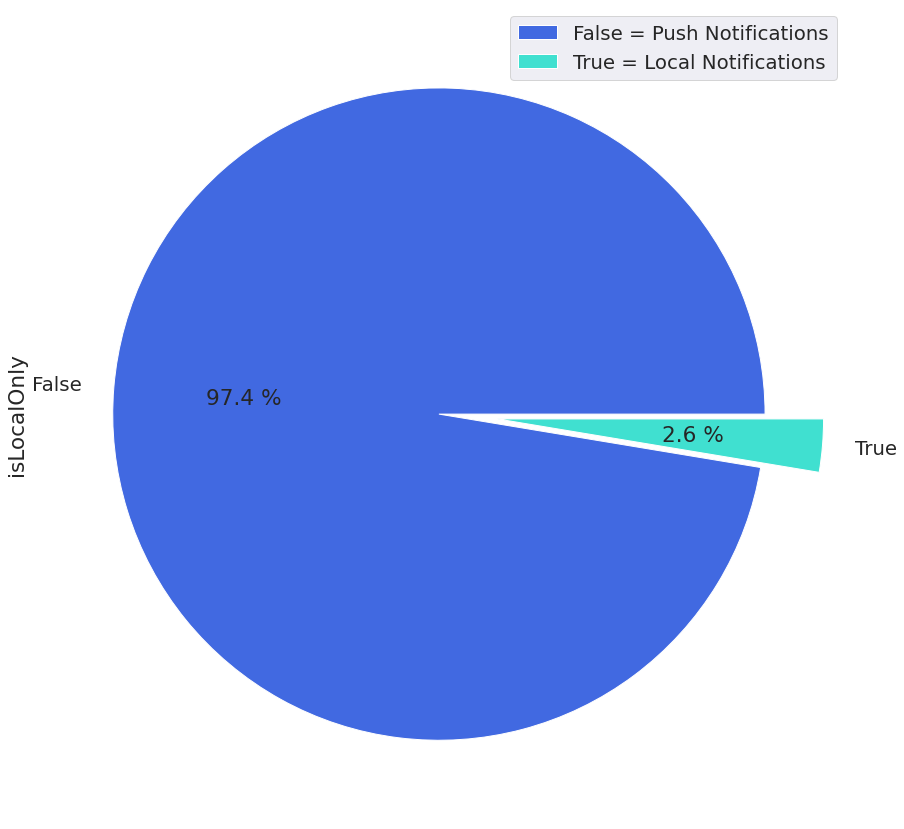

In [139]:
# Plotting the Pie Chart
explode = (0, 0.18)
distribution.plot.pie(figsize=(15,15),autopct='%.1f %%', explode=explode, colors = ['royalblue', 'turquoise']);
plt.legend(["False = Push Notifications", "True = Local Notifications"]);

__Analysis__: __97.4%__ of Notification Logs were push notifications meaning that they were sent from a remote server to the user's personal mobile phone while __2.6%__ of the notifications were Local Notifications meaning that they originated locally within the mobile device's applications.

In [104]:
# Group Notifications by NotificationType & Find mean of actionCount
notification_types = notifications_df.groupby(['isLocalOnly'])['actionCount'].mean()

# Sort top 15 most engaging apps that triggered notification user action 
app_type = notification_types.sort_values(ascending=False)
app_type

isLocalOnly
True     0.714286
False    0.420113
Name: actionCount, dtype: float64


__Analysis__: We observe that __Local Notifications__ (True) have a relatively higher user action average count of *__0.714286__* in comparison to __Push Notifications__ (False) with a user action average count of *__0.420113__*. This means that user interacted slightly more with Local Notifications originating from his mobile device's apps than those coming from remote servers (Push Notifications)

# 5. What is the Distribution of Notifications sent via WiFi connection, Mobile Internet and without Internet Connection??

This question seeks to identify the distribution of notifications across different types on internet networks such as WiFi, Mobile Internet and notifications attribute to No internet connection.

To evaluate this, I grouped all notifications in the log by their __connectionType__ and evaluated the value count for each __connectionType__ (WiFi, Mobile Internet or No Internet)

In [127]:
connection_types = notifications_df.groupby('connectionType')['connectionType'].count()
connection_types.sort_values(ascending=False).head()

connectionType
wifi      3251
none       738
mobile     555
Name: connectionType, dtype: int64

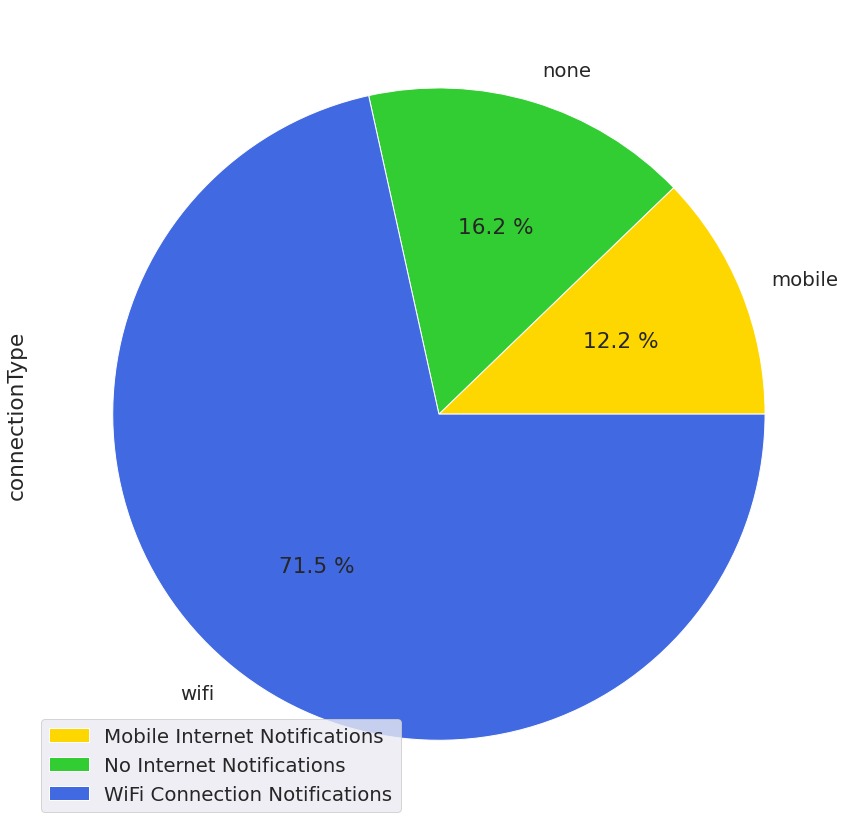

In [140]:
# Visualising Observations on a Pie Chart
connection_types.plot.pie(figsize=(15,15),autopct='%.1f %%', colors = ['gold', 'limegreen', 'royalblue']);
plt.legend(["Mobile Internet Notifications", "No Internet Notifications", "WiFi Connection Notifications"],);

__Observation__: The vast majority of notifications came from __WiFi internet connection (3251 notifications/ 71.5% of Notifications)__, followed closely by notifications from __No Internet Connection (738 notifications/ 16.2% of Notifications)__ and lastly notifications from __Mobile Internet Network (555 notifications/ 12.2% of Notifications)__

# 6. Which apps sent the most high priority notifications?

This question seeks to identify the mobile applications responsible for sending the highest volume of high priority notifications i.e Notifications with __priority__ of +1 and +2.

To evaluate this, I grouped all __appNames__ in the log by their __priority__ and evaluated the value count for each __appName__ __per __priority__ level.

In [182]:
top_priority = notifications_df[notifications_df['priority']>0]
top_priority[['appName', 'priority']].sample(10)

,appName,priority
2795,Samsung Health,2
2623,Samsung Health,2
2283,Samsung Health,2
4022,Samsung Health,2
2200,TikTok Lite,1
2470,Samsung Health,2
2334,Samsung Health,2
2710,Samsung Health,2
2705,Samsung Health,2
2570,Samsung Health,2


In [187]:
top_priority_notifiers = top_priority.groupby(['appName', 'priority'])['priority'].count()
top_priority_notifiers.sort_values(ascending=False).head(11)

appName               priority
Samsung Health        2           952
Call                  2            76
WhatsApp              1            55
Google Play services  1            40
TikTok Lite           1             9
Facebook              2             8
Android System        1             6
Instagram             1             5
Pinterest             1             5
WhatsApp              2             4
Truecaller            2             3
Name: priority, dtype: int64

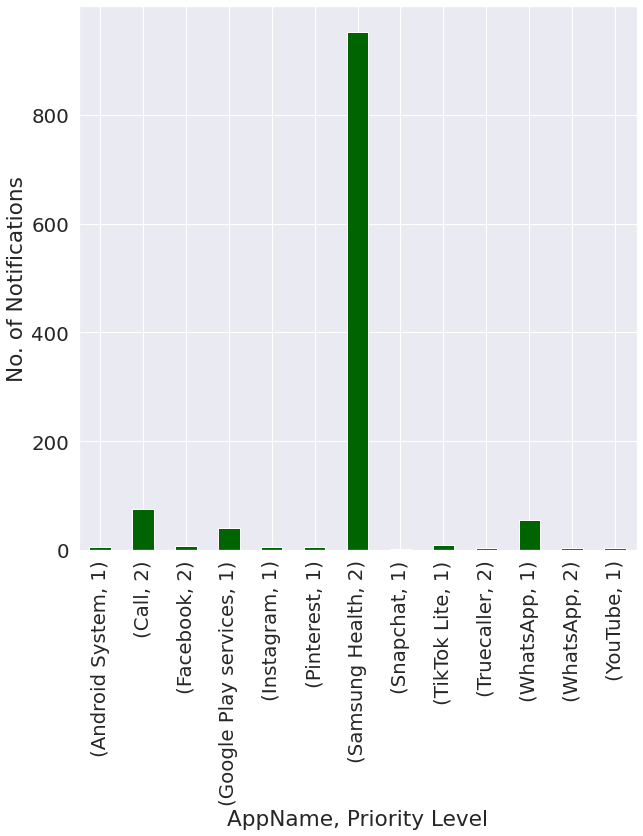

In [202]:
top_priority_notifiers.plot(figsize=(10,10),kind='bar', color='darkgreen')
plt.ylabel('No. of Notifications')
plt.xlabel('AppName, Priority Level');

In [200]:
# Percentages of AppNames above
percentages = (top_priority_notifiers/top_priority_notifiers.sum())*100
percentages.sort_values(ascending=False).head(11)

appName               priority
Samsung Health        2           81.506849
Call                  2            6.506849
WhatsApp              1            4.708904
Google Play services  1            3.424658
TikTok Lite           1            0.770548
Facebook              2            0.684932
Android System        1            0.513699
Instagram             1            0.428082
Pinterest             1            0.428082
WhatsApp              2            0.342466
Truecaller            2            0.256849
Name: priority, dtype: float64

__Observation__: The Top 10 Mobile Applications with the highest number of high priority notifications were as follows:
    
    1. Samsung Health : 952 Notifications
    2. Call : 76 Notifications     
    3. WhatsApp : 59 Notifications     
    4. Google Play Services : 40 Notifications
    5. TikTok Lite: 9 Notifications     
    6. Facebook : 8 Notifications     
    7. Android System : 6 Notifications     
    8. Instagram : 5 Notifications     
    9. Pinterest : 5 Notifications     
    10. Truecaller : 3 Notifications

`Samsung Health` contributed to __952 Notifications(81.51%)__ with a priority rating of +1 or +2 followed in a distant second by `Call` App with a contribution of __76 Notifications(6.51%)__. Honorable mentions include; `WhatsApp` __55 Notifications(4.71%)__, `Google Play Services`__40 Notifications(3.42%)__, `TikTok Lite` __9 Notifications(0.77%)__ & `Facebook` __8 Notifications(0.68%)__
